<a href="https://colab.research.google.com/github/Sachinborade07/Stock_Prediction/blob/main/Tata_Steel_Stock_Forcasting_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# dataset is present at @ https://finance.yahoo.com/quote/TATASTEEL.NS/history/

In [22]:
import pandas as pd

In [23]:
# reading csv file
df = pd.read_csv('TATASTEEL.NS.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-06-19,115.449997,115.599998,113.050003,114.099998,110.493675,33502185
1,2023-06-20,114.099998,115.250000,113.500000,114.250000,110.638939,30371599
2,2023-06-21,114.900002,114.900002,112.849998,113.900002,110.300003,35627983
3,2023-06-22,110.599998,112.199997,110.550003,111.099998,111.099998,34769987
4,2023-06-23,110.500000,110.750000,109.199997,109.599998,109.599998,22190233
...,...,...,...,...,...,...,...
239,2024-06-11,180.500000,183.750000,180.500000,181.330002,181.330002,55555544
240,2024-06-12,182.250000,183.869995,181.500000,182.229996,182.229996,33304643
241,2024-06-13,183.399994,184.100006,180.509995,182.559998,182.559998,36669164
242,2024-06-14,182.949997,183.500000,181.399994,183.149994,183.149994,28509237


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       244 non-null    object 
 1   Open       244 non-null    float64
 2   High       244 non-null    float64
 3   Low        244 non-null    float64
 4   Close      244 non-null    float64
 5   Adj Close  244 non-null    float64
 6   Volume     244 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.5+ KB


In [25]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
# Business Understanding
'''
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Date       244 non-null    object      --> Date when market is open
 1   Open       244 non-null    float64     --> price from which market is started
 2   High       244 non-null    float64     --> highest price of that day
 3   Low        244 non-null    float64     --> lowest price of that day
 4   Close      244 non-null    float64     --> price at which market is closed
 5   Adj Close  244 non-null    float64     --> The adjusted closing price is attributed to anything that would affect the stock price after the market closes for the day
 6   Volume     244 non-null    int64       --> volume of shares traded
 '''

In [26]:
df = df[['Date' , 'Close']]
df

,Date,Close
0,2023-06-19,114.099998
1,2023-06-20,114.250000
2,2023-06-21,113.900002
3,2023-06-22,111.099998
4,2023-06-23,109.599998
...,...,...
239,2024-06-11,181.330002
240,2024-06-12,182.229996
241,2024-06-13,182.559998
242,2024-06-14,183.149994


In [27]:
import datetime

def str_to_datetime(s):
  if isinstance(s, datetime.datetime):
    return s
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]),int(split[2])
  return datetime.datetime(year=year,month=month,day=day)

##just trying to apply the function one colums
datetime_object = str_to_datetime('2024-06-18')
datetime_object
# This output we want datetime.datetime(2024, 6, 18, 0, 0)

datetime.datetime(2024, 6, 18, 0, 0)

In [28]:
# Let's apply this functino of our column
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-28-24fae407ce57>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0     2023-06-19
1     2023-06-20
2     2023-06-21
3     2023-06-22
4     2023-06-23
         ...    
239   2024-06-11
240   2024-06-12
241   2024-06-13
242   2024-06-14
243   2024-06-18
Name: Date, Length: 244, dtype: datetime64[ns]

In [29]:
# Making the Date column as the INDEX
df.index = df.pop('Date')
df

,Close
Date,
2023-06-19,114.099998
2023-06-20,114.250000
2023-06-21,113.900002
2023-06-22,111.099998
2023-06-23,109.599998
...,...
2024-06-11,181.330002
2024-06-12,182.229996
2024-06-13,182.559998


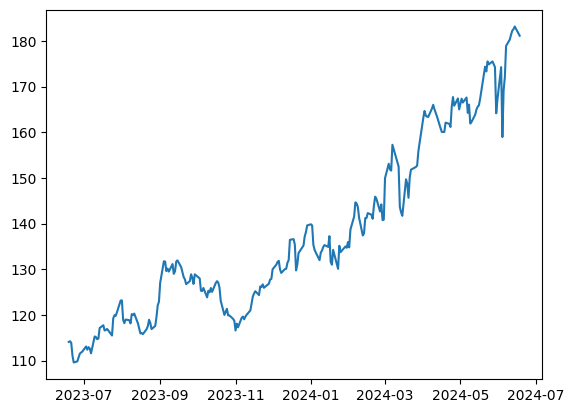

In [30]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [31]:
# We are using LSTM so we need to convert this into the SUPERVISED LEARNING PROBLEM

In [32]:
import numpy as np

def df_to_supervised(dataframe, first_date, last_date, n=3):
  first_date = str_to_datetime(first_date)
  last_date  = str_to_datetime(last_date)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df


targeted_df = df_to_supervised(df,
                                '2023-06-22',
                                '2024-06-12',
                                n=3)
targeted_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2023-06-22,114.099998,114.250000,113.900002,111.099998
1,2023-06-23,114.250000,113.900002,111.099998,109.599998
2,2023-06-26,113.900002,111.099998,109.599998,109.849998
3,2023-06-27,111.099998,109.599998,109.849998,110.750000
4,2023-06-28,109.599998,109.849998,110.750000,111.550003
...,...,...,...,...,...
233,2024-06-06,174.250000,158.949997,169.199997,172.050003
234,2024-06-07,158.949997,169.199997,172.050003,178.899994
235,2024-06-10,169.199997,172.050003,178.899994,180.289993
236,2024-06-11,172.050003,178.899994,180.289993,181.330002


In [33]:
'''
 The above function taking the three previous values as
  target-3   --> 3 day ago what was the stock closing value
  target-2   --> 2 day ago what was the stock closing value
  target-1   --> 1 day ago what was the stock closing value
  target     --> todays closing value
  is what actually it is.

'''

In [35]:
'''
Here we are going to listed three things
date
X == [target-3, target-2, target-1] --> It is going to be three dimentional tensor
y == target --> output vector
'''

def targeted_df_to_date_X_y(targeted_dataframe):
  df_as_np = targeted_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = targeted_df_to_date_X_y(targeted_df)



In [36]:
dates.shape, X.shape, y.shape

((238,), (238, 3, 1), (238,))

In [37]:
q_80 = int(len(dates) * .8)
# q_80 is spliting the data into 80%
q_90 = int(len(dates) * .9)
# q_90 is splitting the data into 90%

# here we are defining training data as 80% of the following
dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

# here we are defining validation data as 10% of the following
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]

# here we are defining testing data as 10% of the following
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

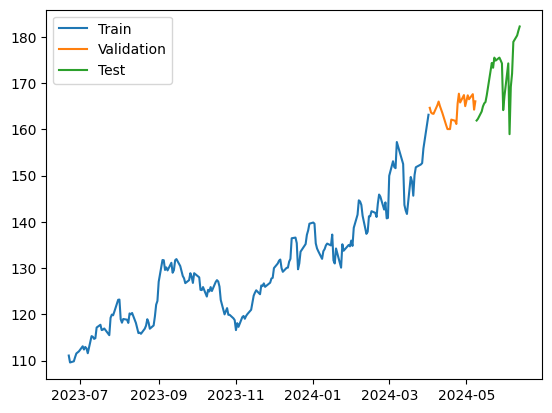

In [38]:
# Just plotting the above data

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization, Dropout

model = Sequential([
    layers.Input((3, 1)),
    layers.LSTM(64, return_sequences=True),
    layers.LSTM(64),
    BatchNormalization(),
    layers.Dense(32, activation='relu'),
    Dropout(0.5),
    layers.Dense(32, activation='relu'),
    Dropout(0.5),
    layers.Dense(1)
])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

model.fit(X_train, y_train,
          validation_data=(X_val, y_val),
          epochs=100,
          callbacks=[early_stopping, model_checkpoint])


Epoch 1/100
6/6 [==============================] - 6s 203ms/step - loss: 16825.2754 - mean_absolute_error: 129.2220 - val_loss: 26962.9082 - val_mean_absolute_error: 164.1874
Epoch 2/100
6/6 [==============================] - 0s 24ms/step - loss: 16764.1113 - mean_absolute_error: 128.9863 - val_loss: 26914.2891 - val_mean_absolute_error: 164.0393
Epoch 3/100
1/6 [====>.........................] - ETA: 0s - loss: 17347.8164 - mean_absolute_error: 131.1812

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 20ms/step - loss: 16650.6152 - mean_absolute_error: 128.5522 - val_loss: 26860.3184 - val_mean_absolute_error: 163.8748
Epoch 4/100
6/6 [==============================] - 0s 24ms/step - loss: 16498.2891 - mean_absolute_error: 127.9303 - val_loss: 26794.1387 - val_mean_absolute_error: 163.6728
Epoch 5/100
6/6 [==============================] - 0s 24ms/step - loss: 16130.8701 - mean_absolute_error: 126.4661 - val_loss: 26637.0703 - val_mean_absolute_error: 163.1923
Epoch 6/100
6/6 [==============================] - 0s 27ms/step - loss: 15609.3857 - mean_absolute_error: 124.2140 - val_loss: 26314.8223 - val_mean_absolute_error: 162.2022
Epoch 7/100
6/6 [==============================] - 0s 24ms/step - loss: 14955.9082 - mean_absolute_error: 121.4684 - val_loss: 25815.2812 - val_mean_absolute_error: 160.6553
Epoch 8/100
6/6 [==============================] - 0s 29ms/step - loss: 13944.3369 - mean_absolute_error: 116.9492 - val_loss: 25199.3418 - va

6/6 [==============================] - 1s 4ms/step


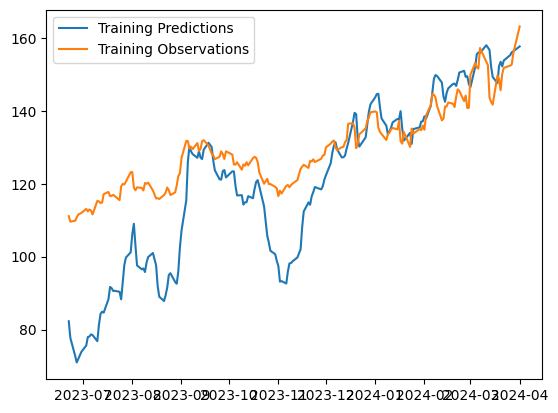

In [50]:
# now let's predict the train values
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 57ms/step


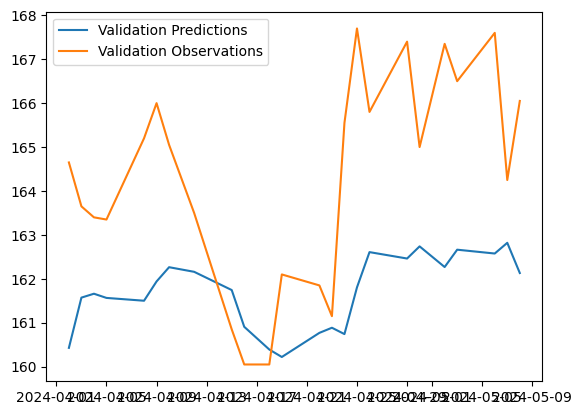

In [51]:
# now let's predict the validation values
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 24ms/step


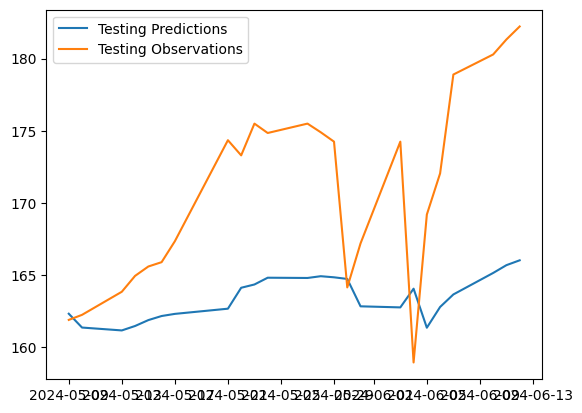

In [52]:
# now let's predict testing values
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

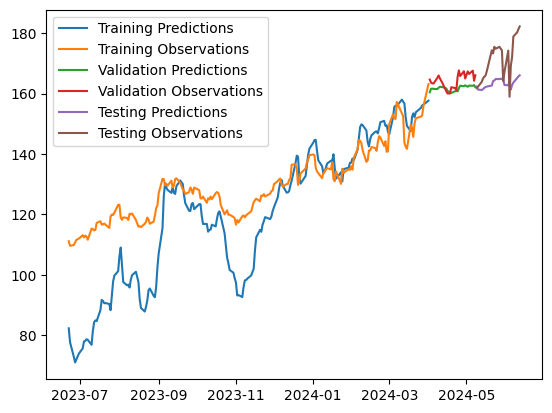

In [53]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [57]:
from copy import deepcopy

recursive_predictions = []

for target_date in recursive_dates:
    # Reshape to (1, sequence_length, features) assuming your model expects a sequence length of 51
    next_prediction = model.predict(last_window.reshape(1, 51, 1)).flatten()
    recursive_predictions.append(next_prediction)
    last_window = np.roll(last_window, -1)
    last_window[-1] = next_prediction

print(recursive_predictions)

1/1 [==============================] - 0s 26ms/step
[array([64.54346], dtype=float32), array([49.025238], dtype=float32), array([56.272907], dtype=float32), array([51.22441], dtype=float32), array([54.40435], dtype=float32), array([52.282784], dtype=float32), array([53.640038], dtype=float32), array([52.735847], dtype=float32), array([53.313454], dtype=float32), array([52.926918], dtype=float32), array([53.172493], dtype=float32), array([53.007034], dtype=float32), array([53.11136], dtype=float32), array([53.04045], dtype=float32), array([53.084736], dtype=float32), array([53.05432], dtype=float32), array([53.07309], dtype=float32), array([53.06002], dtype=float32), array([53.067966], dtype=float32), array([53.06234], dtype=float32), array([53.065697], dtype=float32), array([53.06327], dtype=float32), array([53.064697], dtype=float32), array([53.063637], dtype=float32), array([53.064247], dtype=float32), array([53.06378], dtype=float32), array([53.064037], dtype=float32), array([53.063

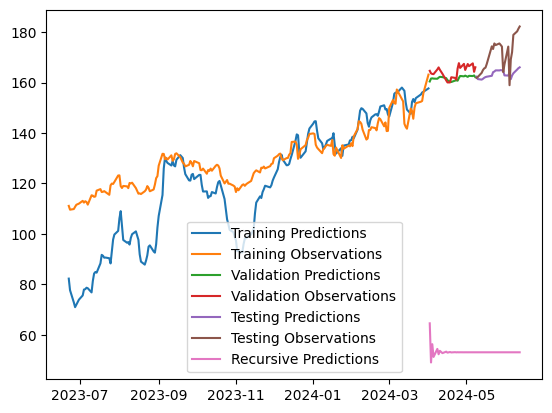

In [58]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])

In [ ]:
# Observation
'''
  as we can see the LSTM model are not good at forecating but with the help of
  1. LSTM Layers: Added an extra LSTM layer with return_sequences=True to
     allow the next LSTM layer to process sequences.
  2. Batch Normalization: Added after the LSTM layers to stabilize and
     accelerate training.
  3. Dropout Layers: Added after the dense layers to help prevent overfitting.
  4. Early Stopping and Model Checkpoint: Added callbacks to stop training
     early if validation loss doesn't improve and to save the best model
     during training.

'''